# Part I - (San Francisco FordGo Bikeshare Analysis)
## by (Owoseni Timileyin)

## Introduction
> Bike sharing is a mode of transportation that is enjoyable to use, convenient, inexpensive, and good for your health. 
> It entails the use of a large number of bicycles with distinctive designs that are docked at a series of designated locations. Unlocked bikes can be returned to any other station in the system, even if they were originally rented from a different station. 
> People utilize bike sharing for a variety of purposes, including commuting to work or school, running errands, and getting to appointments. 
> The dataset utilized in this project contains the bike share 2019 records, which has about 183,412 observations and 16 features.


## Preliminary Wrangling


In [181]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [182]:
# Loading in the fordgobike share dataset into a pandas dataframe
bikeshare = pd.read_csv('fordgobikeshare.csv')
#printing just the first five columns of the dataset
bikeshare.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [183]:
# printing the shape and content of the dataset just to have an overview
print(bikeshare.shape)
print(bikeshare.dtypes)


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of my interest are; 
- user_type
- gender
- duration
- member age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_station_name,
bike_id
end_station_name, 
usertype,
start_time, 
end_time, 
member_birth_year,
member_gender,
duration, 
start_latitude and longitude, 
end_latitude and longitude.

#### Here, I will like to example the data more clearly, so as to know where I would need to do a cleaning

In [184]:
# using the .info() function to know more about the data
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [185]:
bikeshare.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [186]:
bikeshare.duplicated().sum()

0

In [187]:
bikeshare.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [188]:
bikeshare.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [189]:
bikeshare.member_birth_year.unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,
        1902.,  1910.,  1938.,  1927.])

In [190]:
bikeshare.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

- From this little observation, it can be clearly seen that some of the columns has the wrong datatypes, as well as some columns contained in them NaN values.

- Hence, before proceeding to the exploration phase, I will like to address this observation by cleaning the dataset.

- The best approach to data clean is to first have the copy of the dataset before cleaning, so I can get to come back to the original dataset, if an issue should arise.

- In the next code snippet, I have my copied dataset for cleaning.



In [191]:
clean_bikeshare = bikeshare.copy()

#### In the data wrangling phase, the processes done are;
1. The date column datatype should be changed to datetime datatype
2. The date column should be splitted into hour, day, month and year.
3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype.
5. Calculate the members age by their birth_year information provided.


### Data Wrangling or Preparation Phase

In [192]:
#1. The date column datatype should be changed to datetime datatype
clean_bikeshare['start_time'] = pd.to_datetime(clean_bikeshare['start_time'])
clean_bikeshare['end_time'] = pd.to_datetime(clean_bikeshare['end_time'])

In [193]:
#2. The date column should be splitted into hour, day, month and year.
clean_bikeshare['start_month_name']=clean_bikeshare['start_time'].dt.strftime('%B')
clean_bikeshare['start_month']=clean_bikeshare['start_time'].dt.month.astype(int)
clean_bikeshare['start_week']=clean_bikeshare['start_time'].dt.strftime('%a')
clean_bikeshare['start_day']=clean_bikeshare['start_time'].dt.day.astype(int)
clean_bikeshare['start_hour']=clean_bikeshare['start_time'].dt.hour

In [194]:
#clean_bikeshare.replace([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],inplace=True)

In [195]:
#3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('category')

In [196]:
#4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype.
for col in ['bike_id', 'start_station_id', 'end_station_id']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('object')

In [197]:
#5. Calculate the members age by their birth_year information provided.
clean_bikeshare['Age'] = 2019 - clean_bikeshare['member_birth_year']

In [198]:
# printing to check the changes implemented
clean_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
start_month_name           183412 non-null object
start_month  

#### After, the necessary data cleaning has been done, then I can now move to the exploration analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see 
 


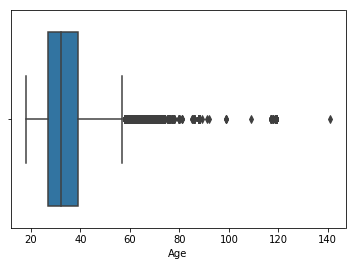

In [199]:
# I will start by looking at the univariate plots of some interested variables
#1. The age of the members
sb.boxplot(data=clean_bikeshare, x='Age')

- From the result below, I could observe that the members ages are below age 60. 
- Therefore, so as to view this chart more clearly, I would remove the members whose ages are greater than 60.
- This ,will be done using the query function.

[ 35.  47.  30.  45.  36.  31.  27.  23.  26.  29.  38.  44.  41.  28.  22.
  33.  19.  37.  24.  39.  46.  34.  48.  40.  52.  21.  25.  42.  20.  32.
  50.  56.  43.  55.  54.  58.  51.  53.  57.  59.  49.  18.]


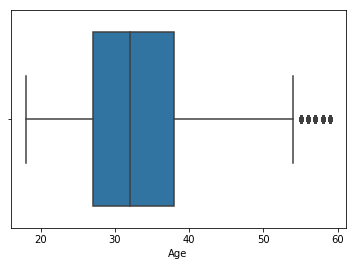

In [200]:
#2. reomve members ages > 60
clean_bikeshare = clean_bikeshare.query('Age < 60')
print(clean_bikeshare.Age.unique())
#So now, I can re-plot the members age chart
sb.boxplot(data=clean_bikeshare, x='Age')

Text(0,0.5,'Number of Users')

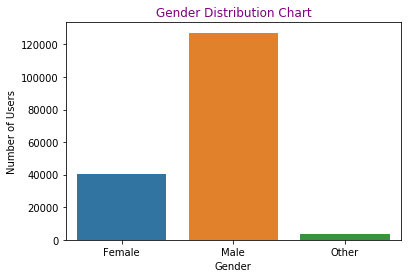

In [201]:
# 3. The Gender distribution
sb.countplot(data = clean_bikeshare, x = 'member_gender')
plt.title('Gender Distribution Chart', color ='purple')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

- From the gender distribution chart above, we can see that the male gender tends to use the bikeshare service more than the female gender and any other gender

17    20548
8     19948
18    15888
9     14884
16    13144
7     10014
19     9307
15     8373
12     7954
13     7754
10     7724
14     7407
11     7198
20     6151
21     4346
6      3200
22     2754
23     1521
0       883
5       800
1       516
2       353
4       176
3       150
Name: start_hour, dtype: int64


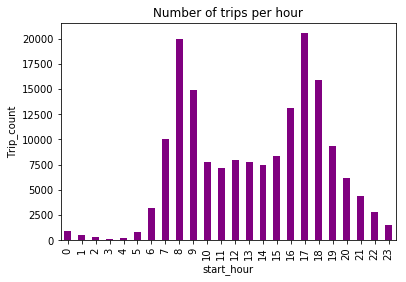

In [202]:
# 4. Number of trips per hour
print(clean_bikeshare['start_hour'].value_counts())
ax = clean_bikeshare['start_hour'].value_counts().sort_index()\
.plot(kind = 'bar',color ='purple',\
      title = "Number of trips per hour")
ax.set_xlabel("start_hour")
ax.set_ylabel("Trip_count")
plt.show()

- In number of trips per hour chart above, it is observed that the highest trips happens to be between 8 am in the morning and 5(17)pm in the evening.
- This is observation is very realistic, since people go to work very early in the morning and returns around 5pm in the evening.
- I was also observed that 3 am in the morning has the lowest trip to occur.

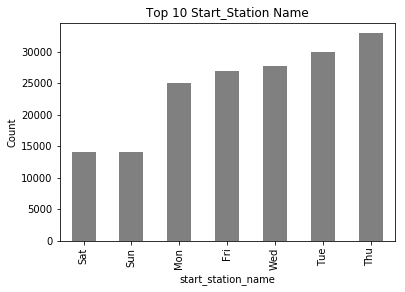

In [205]:
#5. Number of trips per weekdays
#print(clean_bikeshare['start_week'].value_counts())
ax = clean_bikeshare['start_week'].value_counts().sort_values()\
.head(10)\
.plot(kind = 'bar', title = 'Top 10 Start_Station Name', color = 'grey',)
ax.set_xlabel('start_station_name')
ax.set_ylabel('Count')
plt.show()

- In the chart above, it is observed that Thursday has the highest number of trips, followed by Tuesday, then wednesday.
- Also, mon and fridays seems to have almost the same number of trips
- While saturday and sunday seems to have expected reduction on trips, since most people will likely be at home for weekends. 

Subscriber    154618
Customer       16375
Name: user_type, dtype: int64


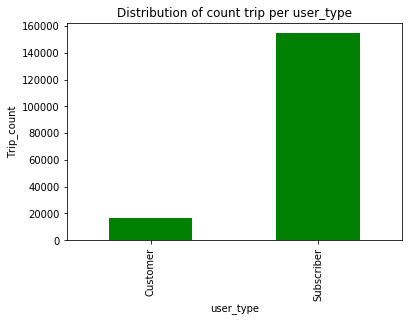

In [24]:
#6. Distribution of count trip per user_type
print(clean_bikeshare['user_type'].value_counts())
ax = clean_bikeshare['user_type'].value_counts().sort_index()\
.plot(kind = 'bar',color ='green',\
      title = "Distribution of count trip per user_type")
ax.set_xlabel("user_type")
ax.set_ylabel("Trip_count")
plt.show()

- From the chart above, it can be seen that subscriber users are more than the customers.
- I will then advice that the fordgobike share business owners should still channel more of there marketing and advertisement to the subscribers.

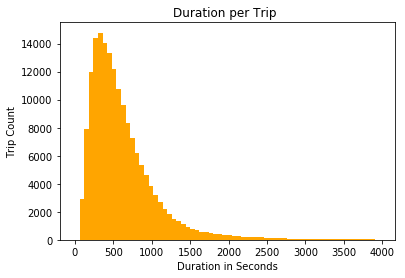

In [25]:
#7. Dutation per trip
binz = np.arange(0, 4000, 60)

plt.hist(data = clean_bikeshare, x = 'duration_sec', bins = binz , color= "orange")
plt.title("Duration per Trip ")
plt.xlabel('Duration in Seconds')
plt.ylabel('Trip Count');

- From the observation above, we can see that the highest trip happens in about 500 seconds, which when converted is 8 minutes.

- Also, it can be observed that there were lesser trips when the duration is high, for example, when the duration is about 3500 secs which is about 58 minutes or let's say an hour. So, I came to a conclusion that maybe people don't travel on a bike to a very far distance.

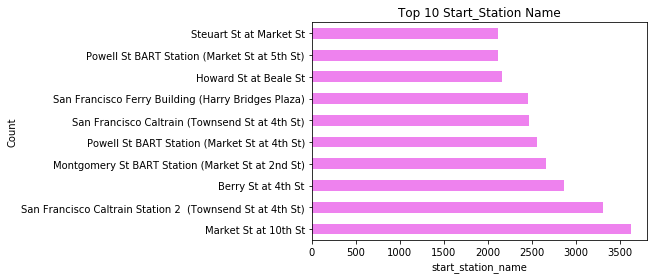

In [26]:
#8.Top ten start_station_name
ax = clean_bikeshare['start_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 Start_Station Name', color = 'violet')
ax.set_xlabel('start_station_name')
ax.set_ylabel('Count')
plt.show()

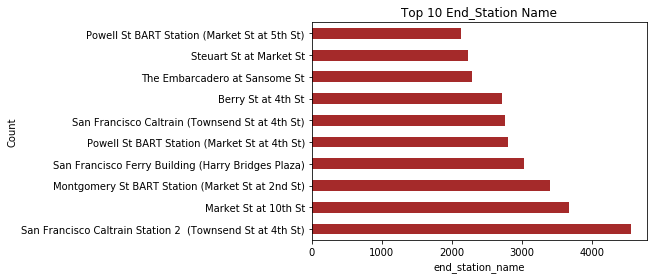

In [27]:
#9.Top ten end_station_name
ax = clean_bikeshare['end_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 End_Station Name', color = 'brown')
ax.set_xlabel('end_station_name')
ax.set_ylabel('Count')
plt.show()

- From the two charts above, it can be observed that there are similaries betweeen the San Francisco Caltrain Station 2 and Market St at 10th St start end end station

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Yes, for the Age, there were unusual points, so I had to do a transformation, because I noticed that the member age was less than 60, so i just used ages less than 60 so that the distributions can be clearer

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Yes, for the date, I had to change the datatype, also. I had to split the data into the hour, weekday and month, so I could have a better insight.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

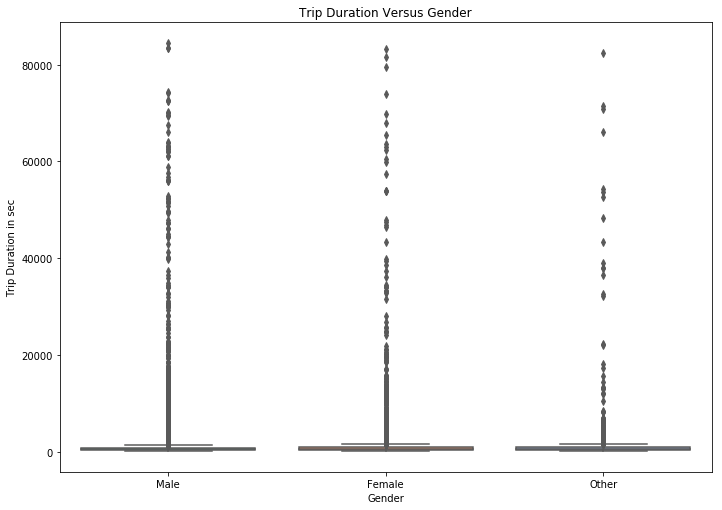

In [207]:
# 10. Trip Duration Versus Gender
plt.figure(figsize = [11.69, 8.27])
sb.boxplot(x='member_gender', y='duration_sec', data = clean_bikeshare, 
           order=['Male', 'Female', 'Other'],palette ='Set2')
plt.title('Trip Duration Versus Gender')
plt.xlabel('Gender')

plt.ylabel('Trip Duration in sec')
plt.show()


- From the duration versus gender plot, we can see that the male gender covers more duration than the female gender.

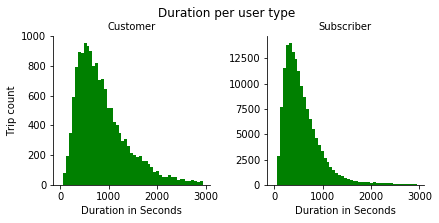

In [29]:
# 11.Duration per user_type
duration_user = sb.FacetGrid(clean_bikeshare, col="user_type", margin_titles=True,sharey = False)
binz = np.arange(0, 3000,60)
duration_user.map(plt.hist, "duration_sec",color="green", bins=binz)
duration_user.set_axis_labels("Duration in Seconds", "Trip count")
duration_user.set_titles(col_template = '{col_name}')
duration_user.fig.suptitle('Duration per user type', y=1.02);

- The charts above shows that the subscribers has the lesser trips compared to the customers

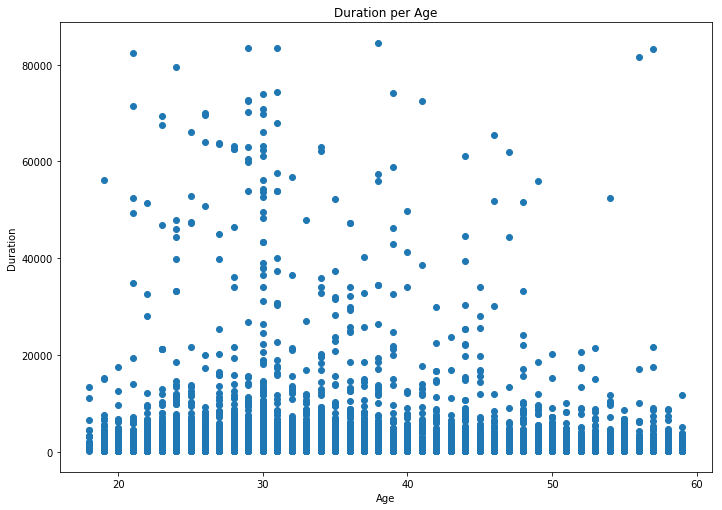

In [30]:
# 12.Duration per Age
#clean_bikeshare['duration_mins'] = clean_bikeshare['duration_sec']/60
plt.figure(figsize=[11.69, 8.27])
plt.scatter(data = clean_bikeshare, x = 'Age', y ='duration_sec', alpha= None)
plt.title('Duration per Age')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

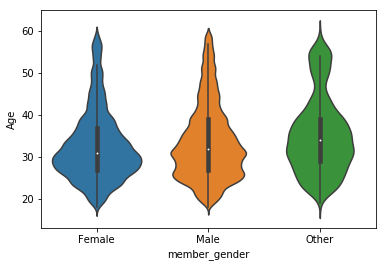

In [31]:
#13.Ages versus Gender
import seaborn as sns
#plt.style.use('ggplot')
#pd.set_option('max_columns',200)
sns.violinplot(x ='member_gender', 
                y = 'Age',
               data = clean_bikeshare)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the male gender covers more duration than the female gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was able to observe that the customers goes on a longer duration of trips than the subscribers, meanwhile, the subscribers has the highest count of trips than the customers

## Multivariate Exploration



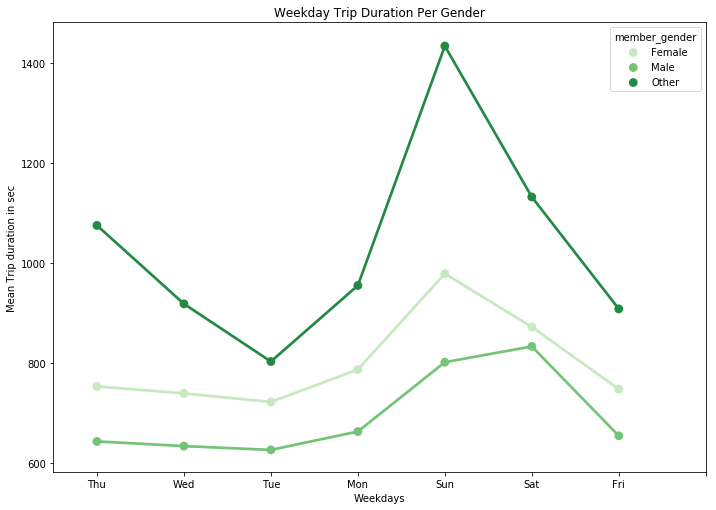

In [32]:
#14. Weekday trip duration per gender
plt.figure(figsize=[11.69, 8.27])
sb.pointplot(data = clean_bikeshare, x = 'start_week', y = 'duration_sec', hue = 'member_gender', palette = 'Greens', ci=None)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.xticks(np.arange(0, 7 + 1, 1))
plt.show()

In [33]:
# Here, I grouped the members age.
clean_bikeshare['age_group'] = clean_bikeshare['Age'].apply(lambda x: 'Teenager' if 12<x<=19
                                                  else 'Young Adult' if 19<x<=30
                                                  else 'Adult' if 30<x<=49
                                                  else 'Senior' if 49<x
                                                           else x)

In [34]:
clean_bikeshare.age_group.value_counts()

Adult          84522
Young Adult    72643
Senior         12116
Teenager        1712
Name: age_group, dtype: int64

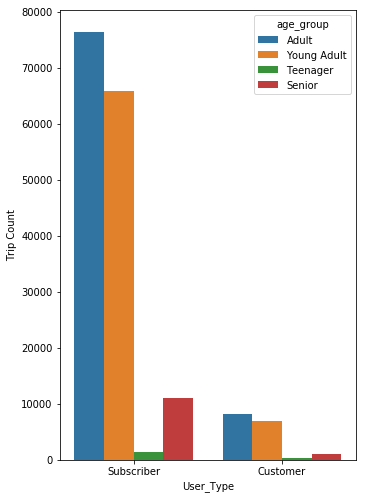

In [35]:
#15. Trip Count for each age group with their user type
plt.figure(figsize = [11.69, 8.27])
plt.subplot(1, 2, 1)
age_chart = sns.countplot(data=clean_bikeshare, x="user_type", hue="age_group", 
                          order=clean_bikeshare.user_type.value_counts().index)
age_chart.set_xlabel('User_Type')
age_chart.set_ylabel('Trip Count');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yeah, I could observed that when I did the age grouping, I could get more insight on the ages of the members
> The adult seems to have the highest trip while the teenagers as expected had the least trip.

### Were there any interesting or surprising interactions between features?

> I was surprised to see that the female gender had more trip than the male gender even during the week day

## Conclusions
- In my project, I utiltized the fordgo bikeshare 2019 dataset.
- Though, the dataset looked clean, but based on some of my analysis, I needed to still do some cleaning and remove outliers.

- The dataset itself is also interesting to analyse and I have been able to document all necessary insight.

- Thank you
